In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import mglearn

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [3]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

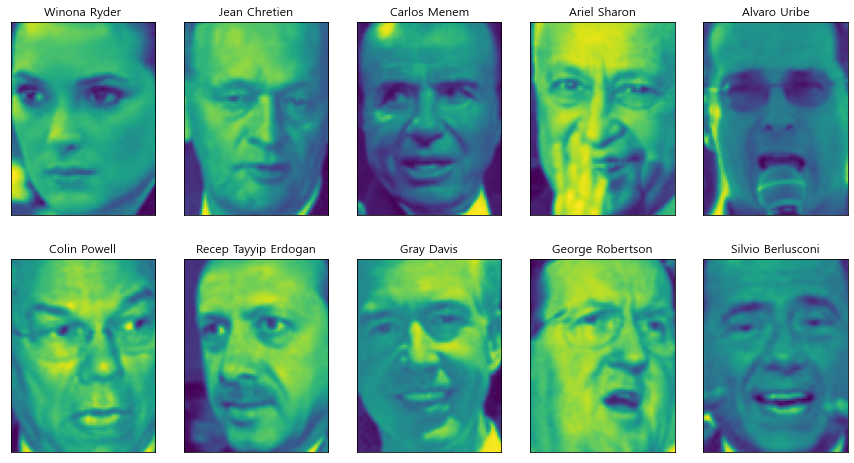

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [5]:
people.target[:10], people.target_names[people.target[0:10]]

(array([61, 25,  9,  5,  1, 10, 48, 17, 13, 54], dtype=int64),
 array(['Winona Ryder', 'Jean Chretien', 'Carlos Menem', 'Ariel Sharon',
        'Alvaro Uribe', 'Colin Powell', 'Recep Tayyip Erdogan',
        'Gray Davis', 'George Robertson', 'Silvio Berlusconi'],
       dtype='<U25'))

In [6]:
print('people', people.images.shape)
print('클래스 개수 :', len(people.target_names))

people (3023, 87, 65)
클래스 개수 : 62


In [7]:
# 각 타깃을 나타난 횟수
counts = np.bincount(people.target)
counts

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24], dtype=int64)

In [8]:
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name, count), end='')
    if (i + 1) % 3 == 0 :
        print()

Alejandro Toledo           39Alvaro Uribe               35Amelie Mauresmo            21
Andre Agassi               36Angelina Jolie             20Ariel Sharon               77
Arnold Schwarzenegger      42Atal Bihari Vajpayee       24Bill Clinton               29
Carlos Menem               21Colin Powell              236David Beckham              31
Donald Rumsfeld           121George Robertson           22George W Bush             530
Gerhard Schroeder         109Gloria Macapagal Arroyo    44Gray Davis                 26
Guillermo Coria            30Hamid Karzai               22Hans Blix                  39
Hugo Chavez                71Igor Ivanov                20Jack Straw                 28
Jacques Chirac             52Jean Chretien              55Jennifer Aniston           21
Jennifer Capriati          42Jennifer Lopez             21Jeremy Greenstock          24
Jiang Zemin                20John Ashcroft              53John Negroponte            31
Jose Maria Aznar           23Jua

In [9]:
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target) :
    mask[np.where(people.target==target)[0][:50]]=1
    
x_people = people.data[mask]
y_people = people.target[mask]

x_people = x_people / 255.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

#훈련, 테스트 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(x_people, y_people, stratify=y_people, random_state=0)

#KNN 모델 정의
#학습
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

#score - accuracy
knn.score(x_train, y_train)

0.5365223012281836

In [35]:
x_train.shape

(1547, 5655)

In [21]:
knn.score(x_test, y_test)

0.2189922480620155

In [22]:
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit(x_train)

PCA(n_components=100, random_state=0, whiten=True)

In [23]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [24]:
x_train_pca.shape

(1547, 100)

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
knn.score(x_train_pca, y_train)

0.6018099547511312

In [27]:
knn.score(x_test_pca, y_test) #위의 테스트데이터 스코어보다 조금 더 높음

0.24224806201550386

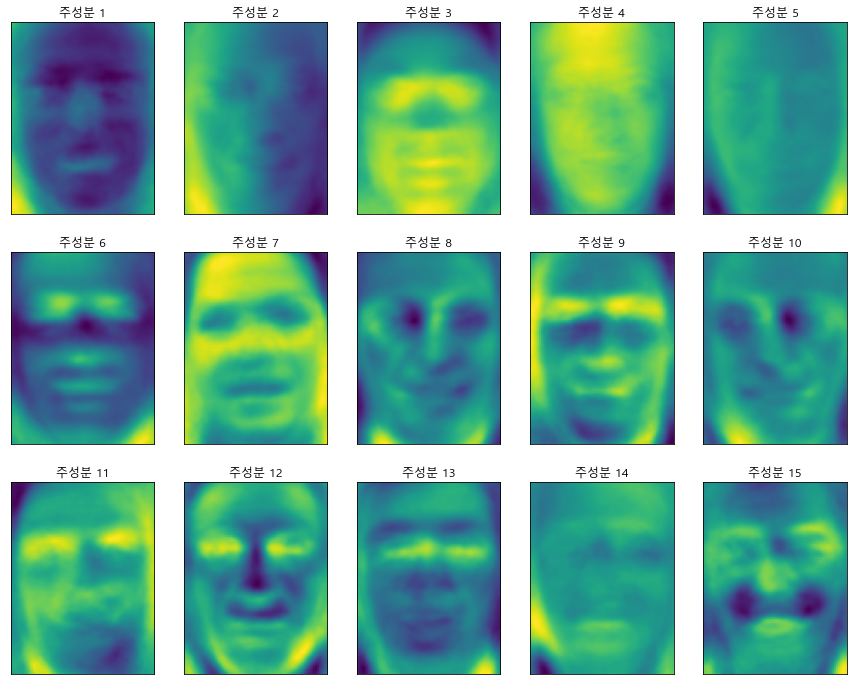

In [34]:
fig, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())) :
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('주성분 {}'.format(i+1))
#주성분1: 어두운 색에 대한 feature 가지고, 주성분3: 밝은 색에 대한 특징, 사람 얼굴 형태에 대한 특징 가지나..